In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
def make_data(n, seed):
    np.random.seed(seed)
    
    shift_matrix = np.array([[3, 3], 
                             [6, 9], 
                             [9, 3]])
    
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
                      columns=['x', 'y'])
    df = df.sample(frac=1.0)

    return df

In [3]:
train = make_data(10, 42)
test = make_data(10, 27)

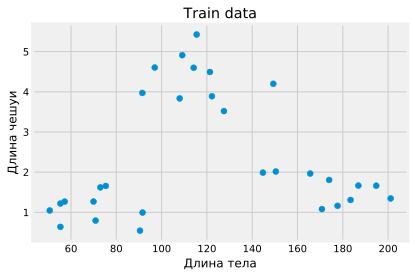

In [4]:
plt.scatter(train['x'], train['y'])

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')

plt.title('Train data')

plt.show()

In [5]:
model = KMeans(n_clusters=3, random_state=100)

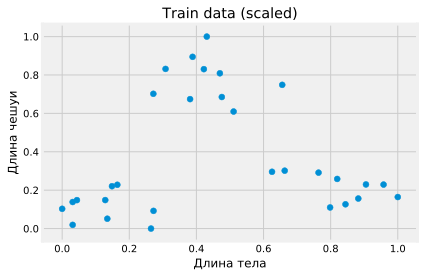

In [6]:
scaler = MinMaxScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=['x', 'y'])

plt.scatter(train_scaled['x'], train_scaled['y'])

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')

plt.title('Train data (scaled)')

plt.show()

In [7]:
# Обучение модели
train_labels = model.fit_predict(train_scaled)

In [8]:
model.cluster_centers_

array([[0.4314873 , 0.77857028],
       [0.12190576, 0.11495728],
       [0.82595794, 0.21634417]])

In [9]:
centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[115.56312871,   4.34494667],
       [ 68.96122223,   1.10467088],
       [174.94355655,   1.59972071]])

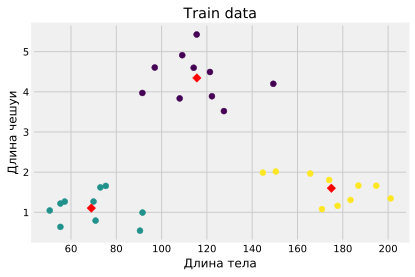

In [10]:
centers = scaler.inverse_transform(model.cluster_centers_)

plt.scatter(train['x'], train['y'], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')

plt.title('Train data')
plt.show()

In [11]:
model.inertia_

0.5417377477488047

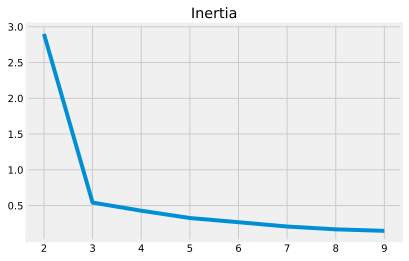

In [12]:
inertias = []

for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    
    temp_inertia = temp_model.inertia_
    
    inertias.append(temp_inertia)

plt.plot(range(2, 10), inertias)

plt.title('Inertia')

plt.show()

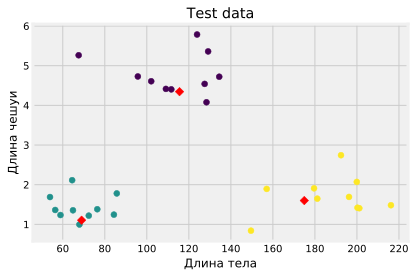

In [13]:
test_scaled = pd.DataFrame(scaler.transform(test), columns=['x', 'y'])

test_labels = model.predict(test_scaled)

plt.scatter(test['x'], test['y'], c=test_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')

plt.title('Test data')

plt.show()

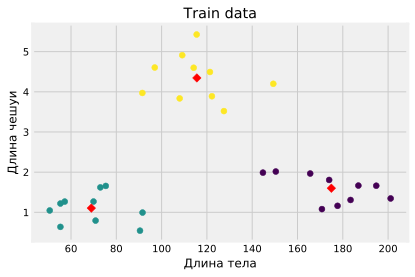

In [14]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3)

train_labels = model.fit_predict(train_scaled)

plt.scatter(train['x'], train['y'], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')

plt.title('Train data')
plt.show()

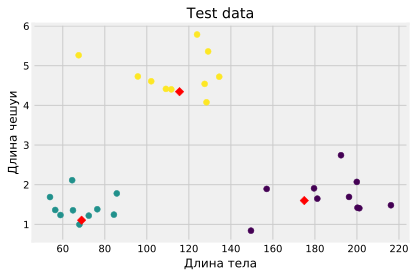

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_scaled, train_labels)

test_labels = knn.predict(test_scaled)

plt.scatter(test['x'], test['y'], c=test_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')

plt.title('Test data')
plt.show()

In [16]:
knn.classes_

array([0, 1, 2])

In [17]:
knn.score

<bound method ClassifierMixin.score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

## Понижение размерности

In [18]:
houses = np.array([[5, 1.6],
                   [4, 1.4],
                   [6, 1.9],
                   [3, 1.1],
                   [4, 1.25]])

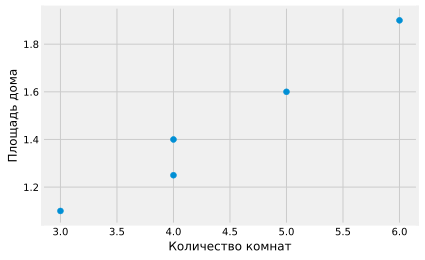

In [19]:
plt.scatter(houses[:, 0], houses[:, 1])

plt.xlabel('Количество комнат')
plt.ylabel('Площадь дома')

plt.show()

In [20]:
houses

array([[5.  , 1.6 ],
       [4.  , 1.4 ],
       [6.  , 1.9 ],
       [3.  , 1.1 ],
       [4.  , 1.25]])

In [21]:
houses_centered = houses - houses.mean(axis=0)
houses_centered

array([[ 0.6 ,  0.15],
       [-0.4 , -0.05],
       [ 1.6 ,  0.45],
       [-1.4 , -0.35],
       [-0.4 , -0.2 ]])

Найдем матрицу ковариаций

In [22]:
covariance_matrix = np.cov(houses_centered.T)
covariance_matrix

array([[1.3   , 0.35  ],
       [0.35  , 0.0975]])

Найдем собственные значения и собственные вектора матрицы ковариаций

In [23]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [24]:
eigenvalues

array([1.39445221, 0.00304779])

In [25]:
eigenvectors

array([[ 0.96546225, -0.26054298],
       [ 0.26054298,  0.96546225]])

т.к ищем только одну главную компоненту, то возмем только один из собствееных векторов, которому соответствует максимальное собственное значение

In [28]:
eigenvectors[:,0]

array([0.96546225, 0.26054298])

умножим центрированные данные на этот вектор

In [31]:
result_pre = np.dot(houses_centered, eigenvectors[:,0])
result = result_pre.reshape(-1, 1)
result

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

### Сравним со встроенным методом

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=1)

In [34]:
mc = pca.fit_transform(houses)
mc

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

Посмотрим какую долю объясненной дисперсии содержит эта компонента

In [35]:
pca.explained_variance_ratio_

array([0.99781911])

## Алгоритм tNSE

In [36]:
from sklearn.model_selection import train_test_split

С помощью tNSE можно снижать размерность данных, что позволяет визуализировать многомерные модели в 2D и 3D

In [37]:
from sklearn.manifold import TSNE

In [38]:
from sklearn.datasets import load_boston

In [39]:
boston = load_boston()

In [41]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [42]:
data = boston.data

In [43]:
feature_names = boston.feature_names

In [44]:
X = pd.DataFrame(data, columns=feature_names)

In [45]:
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [49]:
price = boston.target

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.3, random_state=7)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

#### Масштабирование признаков

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
X_train_scaled = scaler.fit_transform(X_train)

In [55]:
X_test_scaled = scaler.transform(X_test)

In [56]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [57]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Использование tSNE

In [59]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

In [60]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

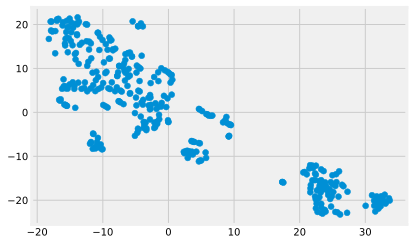

In [63]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Разобъем данные на кластеры

In [64]:
from sklearn.cluster import KMeans

In [86]:
kmeans = KMeans(n_clusters=2)

In [87]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [88]:
pd.value_counts(labels_train)

0    233
1    121
dtype: int64

In [89]:
labels_test = kmeans.predict(X_test_scaled)

График t-SNE

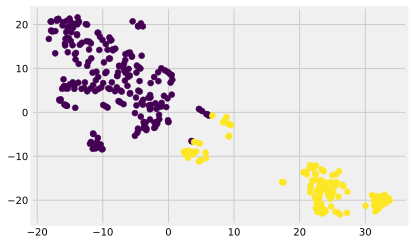

In [90]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)
plt.show()

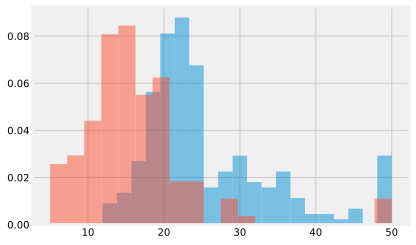

In [91]:
plt.hist(y_train[labels_train==0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train==2], bins=20, density=True, alpha=0.5)
plt.show()

Использование кластеризации в линейной регрессии

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
lr = LinearRegression()

In [94]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
y_test_pred = lr.predict(X_test_scaled)

In [96]:
from sklearn.metrics import r2_score

In [97]:
r2_score(y_test, y_test_pred)

0.6508417720329545

In [99]:
# 1-я модель
lr.fit(X_train_scaled.loc[labels_train==0, :], 
       y_train[labels_train==0])

y_test_pred_0 = lr.predict(X_test_scaled.loc[labels_test == 0, :])

r2_score(y_test[labels_test == 0], y_test_pred_0)

0.832279182183209

In [100]:
# 2-я модель
lr.fit(X_train_scaled.loc[labels_train==1, :], 
       y_train[labels_train==1])

y_test_pred_1 = lr.predict(X_test_scaled.loc[labels_test == 1, :])

r2_score(y_test[labels_test == 1], y_test_pred_1)

0.6485434413922988

In [101]:
# Объединение правильных ответов
y_test_all = np.hstack([y_test[labels_test == 0],
                        y_test[labels_test == 1]])

In [103]:
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1])

In [104]:
r2_score(y_test_all, y_test_pred_all)

0.8081157076940694